# The challenge of future energy systems: Transmission Lines

### Authors: *Gonzalo Sánchez Contreras, Emilio de las Heras Páez de la Cadena, Ignacio Sanz Soriano*
### Date: *26/04/2017*

**Objective:** The aim of this notebook is to analyze and compare transmission line simulation results with the real measures obtained in the laboratory in different load scenarios to study the effects on voltage, current and losses. To achieve these goal, we use a scale transmission line to take measures that are then rescaled to real ones (132 kV, 100 MVA) and compare with simulation results using distributed parameters model.

## Technology (old and new) & Main Characteristics Low Voltage, Medium Voltage, High Voltage

![des](des.jpg "Title")

<img src="C:\Users\nacho\Desktop\descarga.jpg">

#### Transmission Lines (High-Medium Voltage)
Transmission lines are those responsible for bulk movement of electrical energy (from generating substation to some consumption but mainly a distribution substation). Mostly AC systems, mix between Meshed and Radial.
-  HV(defined differently for different regions) is used to have lower losses (due to lower currents).
- Transmission lines are predominantly overhead lines (exceptions are underground lines used for urban areas or environmentally sensitive locations). 
- Transmission is mainly 3-Phase AC although 1-Phase AC is sometimes used.
- HVDC is sometimes implemented for greater efficiency over very long distances (hundreds of kms), also submarine power cables and lastly, in the interchange of power between grids that are not mutually synchronized.


#### Historically ... 
- In very early days, no transmission (DC & generation and loads located near each other).  19th 20th centuries saw a rapid industrialization of this power transmission system.

#### What the future holds ... 
- High-temperature superconductors (HTS) promise to revolutionize power distribution by providing lossless transmission of electrical power. This would translate in having a “supergrid”. This is a system based on an idea for combining very long electric power transmission with liquid nitrogen distribution, to achieve superconductivity in the power lines.
- Distributed generation presents a need for a two-directional distribution system: New regulation, smartgrids, storage (batteries, EVs), Voltage regulation capable of dealing with under and over voltage. 
- DC (IF costs severely drop)

## Simulation: Voltage increase & checking different values of impedance in the lines

#### Scale Transmission Line (Laboratory)
**Electric Patrameters**
Frequency = 50 Hz
Voltage = 220 V
Current = 5 A

$$ R = 1\:\Omega,\quad L = 11 mH,\quad C = 2\cdot 10^{-6}\:\mu F$$

**Measures taken in the lab, feeding a variable load ($cos(\varphi)$)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
V_inicial = np.array([ 222, 221, 221, 221, 222, 222 ])
V_final = np.array([ 224, 216, 208, 199, 190, 182 ])
Pot = np.array([ 0, 1000, 2000, 3000, 4000, 5000])

Now, we calculate the $R_{load}$ for each power consumption.
$$R_{load}= \frac{(U_{load}^{(i)})^2}{P_{load}^{(i)}}$$

In [19]:
# Resistencia de carga
x = range(0,6)
R_load = []

v = []
for i in x:
    if Pot[i] == 0:
        R_load.append(np.inf)
    else:
        R_load.append(V_final[i]**2/Pot[i])
        
print(R_load)

[inf, 46.655999999999999, 21.632000000000001, 13.200333333333333, 9.0250000000000004, 6.6247999999999996]


### Base magnitudes of the Line to calculate *per unit* measures


In [20]:
frecuencia = 50
omega = 2*np.pi*frecuencia

# Magnitudes base de la línea
U = 220
I = 5
S = np.sqrt(3)*U*I
Z = U**2/S

# Parámetros eléctricos de la línea
R = 1
L = 11e-3
C = 2e-6

# Parámetros en p.u.
r = R/Z
x = omega*L/Z
b = omega*C*Z

r_load = R_load/Z

# Medidas en p.u.
v_inicial = V_inicial/U;
v_final = V_final/U;
pot = Pot/S;

### Voltage Drop ($\Delta V$) vs. Power Cosumption ($P_{load}$)

In [21]:
deltaV = (v_inicial - v_final)*100 
print(deltaV)

[ -0.90909091   2.27272727   5.90909091  10.          14.54545455
  18.18181818]


### Plotting Voltage Drop 

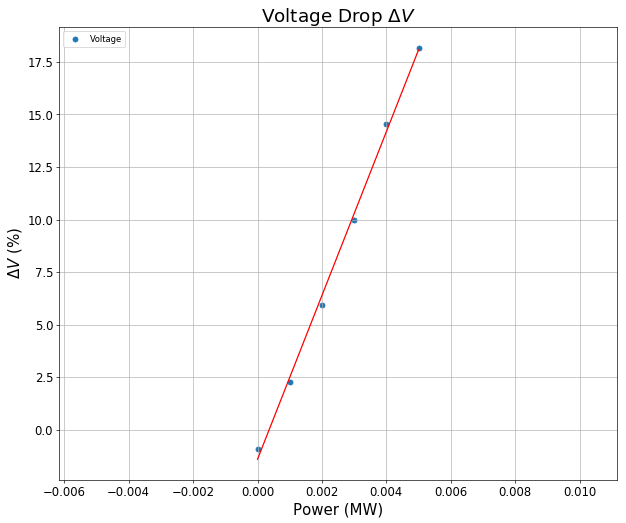

In [22]:
x1 = Pot 
y1 = deltaV
plt.ion()
plt.isinteractive()

fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')
# Plot de la caída de tensión
plt.title(r'Voltage Drop $\Delta V$',fontsize=22)
plt.scatter(x1*1e-6,y1, label = 'Voltage')
plt.xlabel(r'Power (MW)',fontsize=18)
plt.ylabel(r'$\Delta V$ ($\%$)',fontsize=18)
plt.legend(loc = 2)
plt.grid(True)

# Ajuste de los puntos
from pylab import *
m1,b1 = polyfit(x1,y1,1)
X1 = linspace(0,max(Pot),100)
Y1 = m1*X1 + b1
plot(X1*1e-6,Y1,'r')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()


## Modelling 132 kV, 100 MVA, 60 km Transmission Line
Now, once we have per unit parameters from the line in the lab, we re-scale them to the real 132 kV, 100 MVA, 60 km length transmission line obtaining the next electric parameters.

In [23]:
# PARÁMETROS
Ubase = 132e3/sqrt(3)
Sbase = 100e6/3

Ibase  = Sbase/Ubase
Zbase = Ubase**2/Sbase

L = 60 
R = r*Zbase
X = x*Zbase
B = b/Zbase

Z = complex(R,X)
Y = complex(0,B)
R_load = r_load*Zbase
Pot = pot*Sbase

V_inicial=  v_inicial*Ubase
V_final = v_final*Ubase

I_load =[]
for i in range(6):
    if R_load[i] == np.inf:
        I_load.append(0)
    else:
        I_load.append(V_final[i]/R_load[i])
        
deltaV_lab = V_inicial - V_final
print(deltaV_lab)

[  -692.82032303   1732.05080757   4503.33209968   7621.0235533
  11085.12516844  13856.40646055]


The electric parameters of the 132 kV transmission line are:
$$R = 6.86\:\Omega\quad\chi=23.70\:\Omega\quad B = 3.05\cdot10^{-5}\:\Omega^{-1}$$

In [24]:
# Impedancia serie y admitancia paralelo
Zs = Z/L; # Ohm/km
Yp = Y/L; # S/km
print(Zs)
print(Yp)

(0.11431535329954588+0.3950455015302126j)
1.5267671416112946e-06j


Referring them to the length of the line, we obtain:
$$R = 0.114\:\frac{\Omega}{km}\quad\chi=0.3950\:\frac{\Omega}{km}\quad B = 1.53\cdot10^{-6}\:\frac{1}{\Omega\cdot km}$$

Then, the propagation constant $\gamma = \sqrt{Z_s\cdot Y_p}$ and the characteristic impedance $Z_c= \sqrt{\frac{Z_s}{Y_p}}$ are calculated as follows:

In [25]:
# Constante de Propagacion
gamma = np.sqrt(Zs*(Yp));
gamma_A = np.sqrt(Zs*(Yp*1e6))
print("La constante de propagación vale:",gamma_A,"mrad/km")# mrad/km

# Longitud de onda
lambd = 2*pi*1e3/imag(gamma_A) # km
print("La longitud de onda vale:",lambd, "km")

# Velocidad de propagación respecto de la luz
v = lambd*frecuencia/3e8       # m/s
print("La velocidad de propagación respecto de la luz:",v,"veces")

# Impedancia caracteristica
Zc = np.sqrt(Zs/Yp)
abs(Zc)

La constante de propagación vale: (0.111231570162+0.784547610651j) mrad/km
La longitud de onda vale: 8008.67305168 km
La velocidad de propagación respecto de la luz: 0.00133477884195 veces


519.00086863590116

#### Potencia característica de la línea
$$P_c = \frac{U_c^2}{|\bar{Z}_c|}$$

In [26]:
Pc = Ubase**2./abs(Zc)*1e-6
print("La potencia característica de la línea vale:",Pc,"MW")

La potencia característica de la línea vale: 11.1907327155 MW


## Distributed Parameters Model
The calculation of Voltage and Current at the end of the line is made using the transfer matrix of distributed parameters for long transmission lines (line length bigger than 10 km).
$$\begin{bmatrix}
V_l\\
I_l
\end{bmatrix}= \begin{bmatrix}
A & B\\
C & D
\end{bmatrix}  \begin{bmatrix}
V_o\\
I_o
\end{bmatrix} = \begin{bmatrix}
\cosh(\gamma L) & -Z_c\sinh(\gamma L)\\
-\frac{1}{Z_c}\sinh(\gamma L) & \cosh(\gamma L)
\end{bmatrix}\begin{bmatrix}
V_o\\
I_o
\end{bmatrix} $$

In [27]:
# Matriz de transferencia
A = np.cosh(gamma*L);
B = -Zc*np.sinh(gamma*L);
C = -np.sinh(gamma*L)/Zc;
D = np.cosh(gamma*L);
M = np.array([[A, B], [C, D]])
print(M)

[[  9.98914523e-01 +3.14045588e-04j  -6.85395770e+00 -2.36948714e+01j]
 [  9.59087810e-09 -9.15728809e-05j   9.98914523e-01 +3.14045588e-04j]]


#### Voltage drop simulation: Voltage at the begginig $V_o$

**First hypothesis.** The input data for voltage drop simulation are the current feeding the load  and the voltage in the load . Then, changing the load (current at the end of the line), we obtain the different values of voltage drop depending on the power flow through the line.
$$\begin{bmatrix}
V_o\\
I_o
\end{bmatrix}= \begin{bmatrix}
A & B\\
C & D
\end{bmatrix}^{-1} \begin{bmatrix}
V_l\\
I_l
\end{bmatrix} $$

In [28]:
Io = []
Vo = []
V0 = []

for i in range(6):
    V0 = np.linalg.inv(M).dot(np.array([[V_final[i]],[I_load[i]]]))
    Vo.append(V0[0])
    Io.append(V0[1])

# Tensión inicial simulada
V = np.sqrt(3)*np.array(Vo)
# Corriente inicial simulada
I = np.sqrt(3)*np.array(Io)

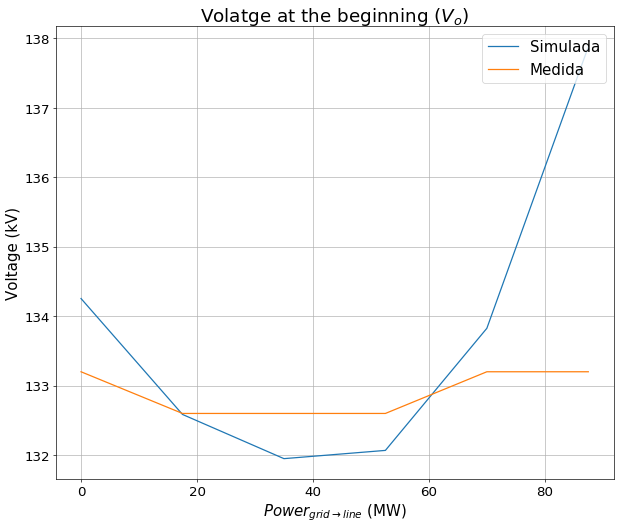

In [29]:
# Tensión inicial medida vs. tensión inicial simulada
fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(Pot*1e-6,abs(V)*1e-3,label = "Simulada")
plt.plot(Pot*1e-6,V_inicial*np.sqrt(3)*1e-3, label = "Medida")
plt.legend(loc = 1,fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r'Volatge at the beginning ($V_o$)',fontsize = 22)
plt.ylabel(r'Voltage (kV)',fontsize =18)
plt.xlabel(r'$Power_{grid\rightarrow line}$ (MW)',fontsize =18)
plt.grid(True)

If we analyze the voltage drop we obtain for every load point:
$$\Delta V^{(i)} = V_o^{(i)}-V_f^{(i)}$$


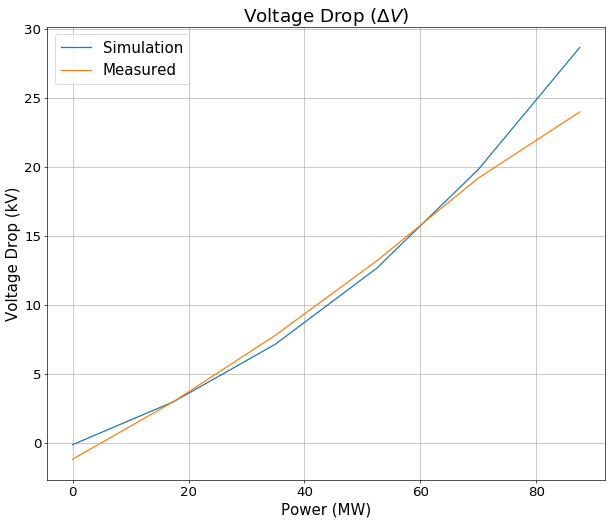

In [30]:
deltav = [abs(V[i]) -  abs(V_final[i]*np.sqrt(3)) for i in range(len(V_final))]
deltav = np.array(deltav)
deltav_lab = (abs(V_inicial*np.sqrt(3)) - abs(V_final*np.sqrt(3)))

fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(Pot*1e-6,deltav*1e-3,label = 'Simulation')
plt.plot(Pot*1e-6,deltav_lab*1e-3,label = 'Measured')

# Title
plt.title(r'Voltage Drop ($\Delta V$)',fontsize = 22)
# Axes labes
plt.xlabel(r'Power (MW)',fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel(r'Voltage Drop (kV)',fontsize = 18)
plt.yticks(fontsize = 16)
# Legend
plt.legend(loc = 2,fontsize = 18)
# Grid
plt.grid(True)


#### Voltage drop simulation: Voltage in the load
**Second hypothesis.** Now, the input data for voltage drop simulation are the current feeding the load  and the voltage at the beginning . Then, changing the load (current at the end of the line), we obtain the different values of voltage drop depending on the power flow through the line.

$$I_o = \frac{I_l-C\cdot V_o}{D}$$

$$V_l = A\cdot V_o + B\cdot I_o$$

In [31]:
Io = [];
Vl = [];

for i in range(len(V_inicial)):
    Io.append((I_load[i]- C*V_inicial[i])/D)
    Vl.append((A*V_inicial[i] + B*Io[i]))
    

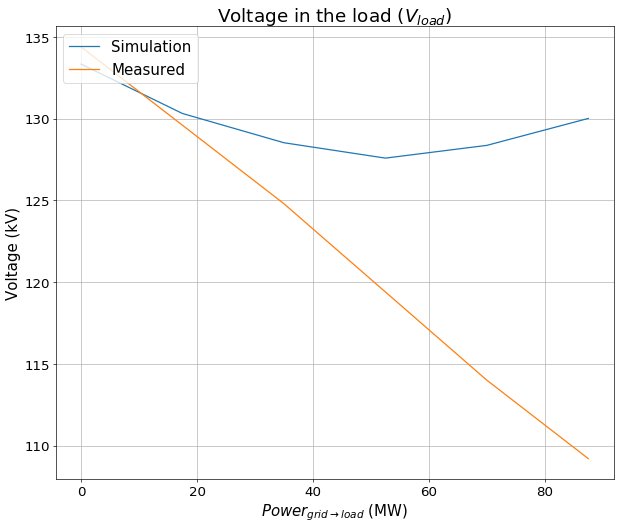

In [32]:
# Tensión simulada en la carga
Vl = np.array(Vl)
Io = np.array(Io)

fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(Pot*1e-6,abs(Vl)*np.sqrt(3)*1e-3,label = 'Simulation')
plt.plot(Pot*1e-6,V_final*np.sqrt(3)*1e-3,label = 'Measured')

# Title
plt.title(r'Voltage in the load ($V_{load}$)',fontsize = 22)
# Axes labes
plt.xlabel(r'$Power_{grid\rightarrow load}$ (MW)',fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel(r'Voltage (kV)',fontsize = 18)
plt.yticks(fontsize = 16)
# Legend
plt.legend(loc = 2,fontsize = 18)
# Grid
plt.grid(True)


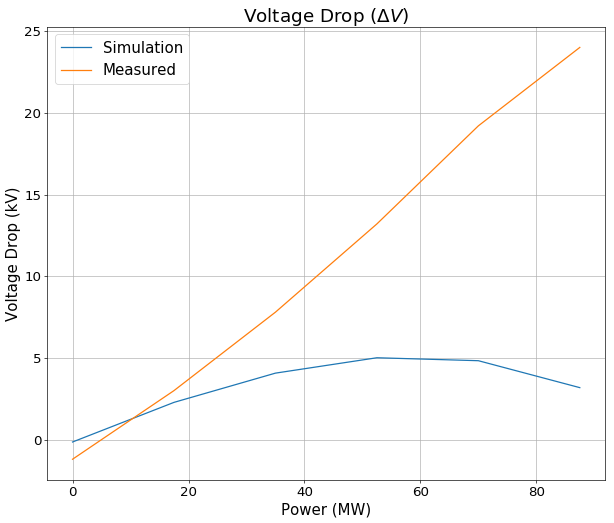

In [79]:
# Caída de tensión simulada
deltaV_sim = (abs(V_inicial) - abs(Vl))*np.sqrt(3)
deltaV = (abs(V_inicial) - abs(V_final))*np.sqrt(3)


fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(Pot*1e-6,deltaV_sim*1e-3,label = 'Simulation')
plt.plot(Pot*1e-6,deltaV*1e-3,label = 'Measured')

# Title
plt.title(r'Voltage Drop ($\Delta V$)',fontsize = 22)
# Axes labes
plt.xlabel(r'Power (MW)',fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel(r'Voltage Drop (kV)',fontsize = 18)
plt.yticks(fontsize = 16)
# Legend
plt.legend(loc = 2,fontsize = 18)
# Grid
plt.grid(True)


#### Analysis of voltage drop in transmission lines with different $\dfrac{R}{\chi}$ relation

In this section, some $R/\chi$ medium voltage transmission lines are analyzed , working with different types of loads, $\cos(\varphi)=0.8$ ind, cap, and  $\cos(\varphi)=1$.

In [34]:
k = 1;
r_l = np.array([0.5, 0.75, 1, 1.25, 1.5, 2])*k
rel = np.arange(1, 2.5, 0.25)
R_tot = r_l;
X_tot = R_tot*rel;

# Datos empleados en la simulación
U_n = 20e3/np.sqrt(3)
cosphi = np.arange(0.5, 1.01, 0.1)
S = 4e6/3
P = S*cosphi
Q = S*np.sin(np.arccos(cosphi))
Q[0] = -Q[0]

# Caídas de tensión en la línea
delta_u = np.zeros((len(P),len(P)))
for i in range(len(R_tot)):
    for j in range(len(R_tot)):
        delta_u[i][j] = (1/U_n)*(R_tot[i]*P[j] + X_tot[i]*Q[j])
        
import pandas as pd
df = pd.DataFrame(delta_u, 
                  index = ['cos(phi) = 0.5','cos(phi) = 0.75','cos(phi) = 1','cos(phi) = 1.25','cos(phi) = 1.5','cos(phi) = 2'],
                  columns = ['R/X = 1', 'R/X = 1.25','R/X = 1.5','R/X = 1.75', 'R/X = 2', 'R/X = 2.25'])

print(df)


                    R/X = 1  R/X = 1.25   R/X = 1.5  R/X = 1.75     R/X = 2  \
cos(phi) = 0.5   -21.132487   80.829038   81.645575   80.829038   77.127639   
cos(phi) = 0.75  -50.448730  138.564065  137.930009  134.233938  125.128752   
cos(phi) = 1     -92.264973  207.846097  204.522206  196.299092  179.421393   
cos(phi) = 1.25 -146.581216  288.675135  281.422168  267.024500  240.005563   
cos(phi) = 1.5  -213.397460  381.051178  368.629894  346.410162  306.881261   
cos(phi) = 2    -334.529946  554.256258  532.737582  496.521232  434.341130   

                 R/X = 2.25  
cos(phi) = 0.5    57.735028  
cos(phi) = 0.75   86.602542  
cos(phi) = 1     115.470056  
cos(phi) = 1.25  144.337571  
cos(phi) = 1.5   173.205086  
cos(phi) = 2     230.940115  


#### Plotting simulation results

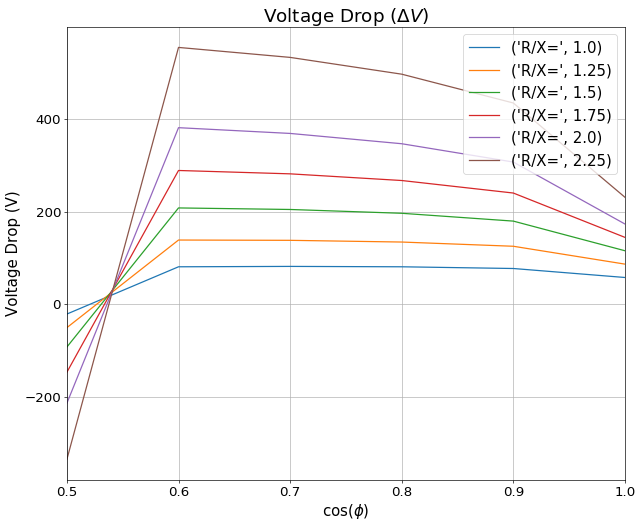

In [35]:
fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')

for i in range(len(cosphi)):
    plt.plot(cosphi,delta_u[i][:],label = (r'R/X=',rel[i]))

# Title
plt.title(r'Voltage Drop ($\Delta V$)',fontsize = 22)
# Axes labes
plt.xlabel('cos($\phi$)',fontsize = 18)
plt.xticks(fontsize = 16)
plt.xlim([0.5,1]);
plt.ylabel(r'Voltage Drop (V)',fontsize = 18)
plt.yticks(fontsize = 16)
# Legend
plt.legend(loc = 1,fontsize = 18)
# Grid
plt.grid(True)


## Load working as generator. Voltage drop
In this section, we assume that the load turns into a generato, injecting power in 132 kV voltage level, connected to an infinite grid. 

$$V_o = \frac{V_l -B\cdot I_o}{A}$$

$$I_l = C\cdot V_o + D\cdot I_o$$

In [36]:
Ip = [];
Vo = [];

for i in range(len(I_load)):
    Vo.append((Ubase - B*I_load[i])/A)
    Ip.append(C*Vo[i] + D*I_load[i])

Vo = np.array(Vo)
Ip = np.array(Ip)

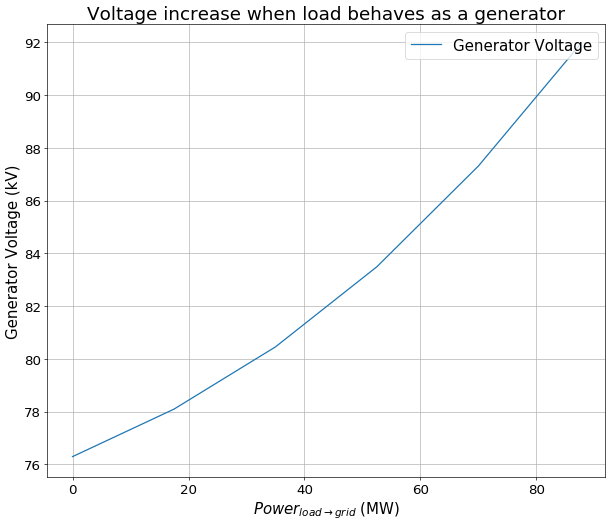

In [37]:
# Caída de tensión en la línea
t = [];
for i in range(len(Pot)):
    t.append(Ubase)
    
deltav = abs(Vo) - t;

fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')

# Ploteo
plt.plot(Pot*1e-6,abs(Vo)*1e-3, label="Generator Voltage")
plt.xlabel(r'$Power_{load\rightarrow grid}$ (MW)', fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel('Generator Voltage (kV)', fontsize = 18)
plt.yticks(fontsize = 16)
# Legend
plt.legend(loc = 1,fontsize = 18)
# Grid
plt.grid(True)
# Title
plt.title('Voltage increase when load behaves as a generator',fontsize = 22)

## Conclusions

#### Conclusions from tests and simulations:

**According to Distributed Parameters Modell in this case:**
- It behaves properly when it comes to modell voltage and current at the beginning of the line from the ones at the end.
- It does not fit so well when we have mixed input (Voltage at the begginig and current in the load).
- We have found some mistakes that differ a lot from actual lines in the propagation constant , because the speed of propagation   is too low in comparison with c and what it is common to find in overhead power lines (speed closed to c).
- We assume it has to do with Capacitance between lines. A improvement must be done in modelling this electric parameter, whose   influence has a determinant role in the rest of the model. (Transfer Matrix, Characteristic Impedance, Reactive Power Losses     and Generation).

**General Solutions:** 
- Compensating with Capacitors, which reduce the voltage drop along the feeder by reducing current flow to loads consuming         reactive:

#### Power Factor ($\cos(\varphi)$) Compensation.

In [38]:
I_load = np.array(I_load)
S_loss = 3*Vo*Io.conjugate() - 3*V_final*I_load.conjugate()

Q_loss = imag(S_loss)
P_loss = real(S_loss)
angle = arctan(Q_loss/P_loss)

print(r'Cos(\phi) por la linea->\n', cos(angle))
print(r'Reactiva perdida en la linea->', Q_loss*1e-6)

Q_C = []
Q_L = []

for i in range(len(Q_loss)):
    if Q_loss[i] < 0:
        Q_L.append(Q_loss[i]) 
    else:
        Q_C.append(Q_loss[i])

Q_L = np.array(Q_L)
Q_C = np.array(Q_C)

C = []
for i in range(len(Q_C)):
    C.append(Q_C[i]/(omega*Ubase**2)*1e6)
    print("Capacidad de los condensadores de compensación",C[i],'MicroFaradios\n')

Cos(\phi) por la linea->\n [  1.04734917e-04   7.18838301e-01   6.01910658e-01   5.95242276e-01
   5.89646793e-01   5.77977481e-01]
Reactiva perdida en la linea-> [  -1.61357195    2.25466888   15.12400254   39.5812723    78.77016266
  135.33183304]
Capacidad de los condensadores de compensación 1.2356807781 MicroFaradios

Capacidad de los condensadores de compensación 8.28877328821 MicroFaradios

Capacidad de los condensadores de compensación 21.6926829893 MicroFaradios

Capacidad de los condensadores de compensación 43.1703194067 MicroFaradios

Capacidad de los condensadores de compensación 74.1691810822 MicroFaradios



#### Plotting results
Different capacities obtained to compensate the power factor depending on the power flow injected in the grid are calculated as follows:
$$ C = \frac{U^2}{\omega\cdot Q_{line}} $$


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text yticklabel objects>)

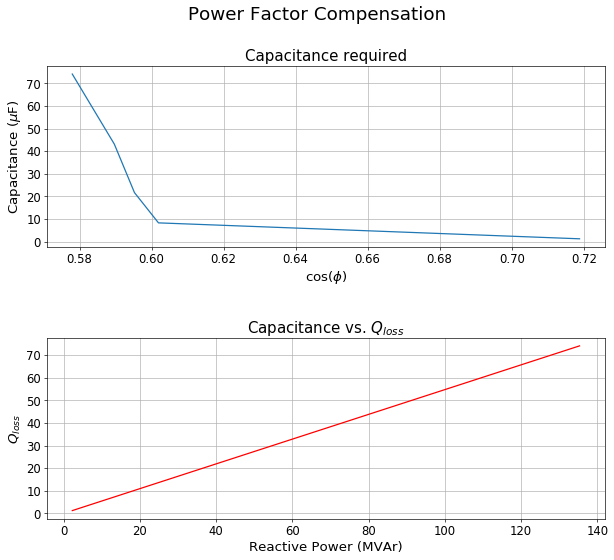

In [39]:
C = np.array(C)

fig=plt.figure(figsize=(12, 10), dpi= 60, facecolor='w', edgecolor='k')
plt.suptitle('Power Factor Compensation', fontsize = 22)
fig.subplots_adjust(hspace=.5)
# Ploteo
plt.figure(1)
plt.subplot(211)
plt.plot(cos(angle[1:len(cosphi)]), C)
plt.grid(True)
plt.xlabel('cos($\phi$)',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Capacitance ($\mu$F)',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Capacitance required',fontsize = 18)


plt.subplot(212)
plt.plot(Q_loss[1:len(Q_loss)]*1e-6, C,'r')
plt.grid(True)
plt.title(r'Capacitance vs. $Q_{loss}$',fontsize =18)
plt.xlabel('Reactive Power (MVAr)',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel(r'$Q_{loss}$', fontsize = 16)
plt.yticks(fontsize = 14)